# Comparison of random number generators

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

N_SAMPLES = 10000
BINS = 100

### 1. Linear Congruential (Standard C library)

In [2]:
linear_congruential = pd.read_csv("data/linear_congruential.csv", nrows=N_SAMPLES)
linear_congruential.describe()

,Linear Congruential Numbers
count,10000.000000
mean,0.499066
std,0.285954
min,0.000089
25%,0.249743
50%,0.496735
75%,0.744693
max,0.999912


### 2. Mersenne-Twister (Python's random)

In [3]:
mersenne_twister = pd.read_csv("data/mersenne_twister.csv", nrows=N_SAMPLES)
mersenne_twister.describe()

,Mersenne-Twister Numbers
count,10000.000000
mean,0.497462
std,0.287910
min,0.000014
25%,0.246757
50%,0.494762
75%,0.747846
max,0.999915


### 3. True random numbers (random.org)

In [4]:
true_random = pd.read_csv("data/true_random.csv", nrows=N_SAMPLES)
true_random.describe()

,True Random Numbers
count,10000.000000
mean,0.502813
std,0.287897
min,0.000166
25%,0.254832
50%,0.504628
75%,0.751536
max,0.999953


In [5]:
true_random_set = set()

for num in true_random["True Random Numbers"]:
    if num in true_random_set:
        print("Duplicate found in true random numbers:", num)
        break

    true_random_set.add(num)

print("Unique true random numbers:", len(true_random_set))

Unique true random numbers: 10000


## Histograms

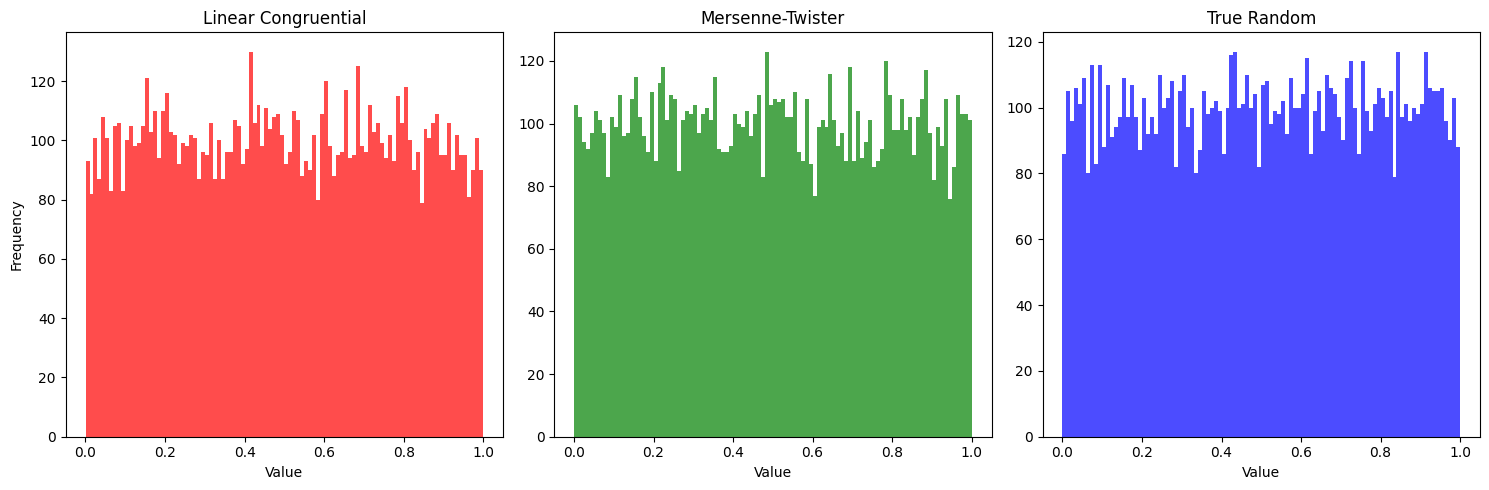

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(linear_congruential, bins=BINS, color="red", alpha=0.7)
plt.title("Linear Congruential")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(mersenne_twister, bins=BINS, color="green", alpha=0.7)
plt.title("Mersenne-Twister")
plt.xlabel("Value")

plt.subplot(1, 3, 3)
plt.hist(true_random, bins=BINS, color="blue", alpha=0.7)
plt.title("True Random")
plt.xlabel("Value")

plt.tight_layout()
plt.savefig("imgs/histogram.png")

## Student's t-Test

In [7]:
ttest = stats.ttest_ind(true_random, linear_congruential)
print(f"True Random vs Linear Congruential: t = {ttest.statistic[0]:.3f}, p = {ttest.pvalue[0]:.3f}")

ttest = stats.ttest_ind(true_random, mersenne_twister)
print(f"True Random vs Mersenne-Twister: t = {ttest.statistic[0]:.3f}, p = {ttest.pvalue[0]:.3f}")

ttest = stats.ttest_ind(linear_congruential, mersenne_twister)
print(f"Linear Congruential vs Mersenne-Twister: t = {ttest.statistic[0]:.3f}, p = {ttest.pvalue[0]:.3f}")

True Random vs Linear Congruential: t = 0.923, p = 0.356
True Random vs Mersenne-Twister: t = 1.314, p = 0.189
Linear Congruential vs Mersenne-Twister: t = 0.395, p = 0.693


### Chi-squared test

In [8]:
def chi2_uniform_test(data, bins=BINS):
    observed = np.histogram(data, bins=bins)[0]
    expected = np.full(bins, len(data)/bins)
    return stats.chisquare(observed, expected)

chi2_c = chi2_uniform_test(linear_congruential)
print(f"Linear Congruential: chi2 = {chi2_c.statistic:.3f}, p = {chi2_c.pvalue:.3f}")

chi2_mt = chi2_uniform_test(mersenne_twister)
print(f"Mersenne-Twister: chi2 = {chi2_mt.statistic:.3f}, p = {chi2_mt.pvalue:.3f}")

chi2_tr = chi2_uniform_test(true_random)
print(f"True Random: chi2 = {chi2_tr.statistic:.3f}, p = {chi2_tr.pvalue:.3f}")

Linear Congruential: chi2 = 94.120, p = 0.620
Mersenne-Twister: chi2 = 87.820, p = 0.782
True Random: chi2 = 79.120, p = 0.929
